In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#한글폰트 가져오기
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False #음수에 (-)표현

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("C:/동국대학교/공모전/전주공모전/df_final_20_22.csv", encoding='cp949')
df

,구급보고서번호,신고시,계절구분명,요일,시간단위기온,시간단위강수량,시간단위풍속,시간단위풍향,시간단위습도,시간단위적설량,환자연령,환자성별구분명,교통사고명,학교로부터_거리,스쿨존여부(300m),버스_정류장_유무(10m),교차로여부,횡단보도여부,경도,위도
0,20224502108M00009,20,겨울,토요일,-0.3,NaN,0.2,0.0,47.0,NaN,71.0,남,보행자,102.964474,1,0,0,0,127.102032,35.832971
1,20224502106M00013,11,겨울,월요일,0.9,NaN,0.6,360.0,61.0,NaN,65.0,여,보행자,659.975234,0,0,0,1,127.106905,35.814580
2,20224501101M00038,14,겨울,월요일,3.2,NaN,2.1,290.0,45.0,NaN,50.0,여,보행자,202.456833,1,0,0,0,127.136227,35.826949
3,20224502106M00020,21,겨울,월요일,-0.4,NaN,1.8,140.0,70.0,NaN,60.0,여,보행자,281.272041,1,0,0,0,127.137265,35.796686
4,20224502106M00022,5,겨울,화요일,0.1,NaN,1.1,140.0,76.0,NaN,53.0,여,보행자,375.408646,0,0,0,0,127.130957,35.787438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,20204501108M03276,15,겨울,화요일,6.1,NaN,3.2,320.0,69.0,NaN,72.0,남,자전거사고,288.643726,1,0,0,0,127.146568,35.834091
2266,20204501105M02795,18,겨울,화요일,0.4,0.9,2.6,320.0,94.0,NaN,25.0,여,보행자,310.949298,0,0,0,0,127.117699,35.859440
2267,20204511304M01388,19,겨울,화요일,0.1,NaN,3.5,320.0,97.0,0.6,13.0,여,보행자,545.489543,0,0,0,0,127.059395,35.837220
2268,20204501105M02811,12,겨울,목요일,-3.7,NaN,0.2,0.0,52.0,1.4,66.0,여,보행자,104.809945,1,0,0,0,127.148804,35.863052


연령

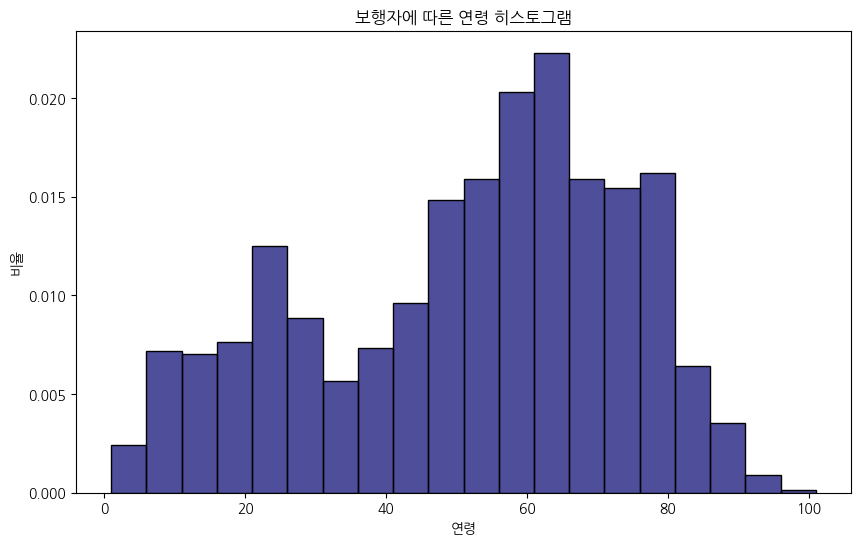

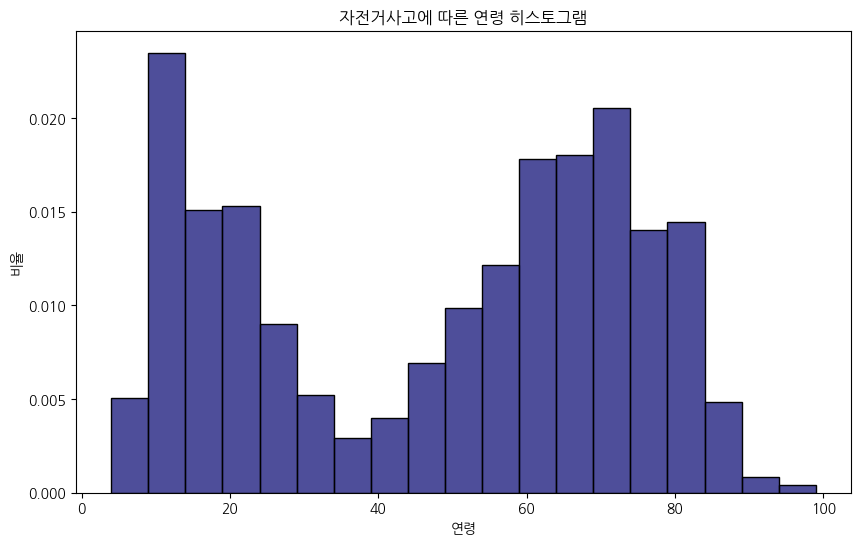

In [5]:
unique_accident_types = df['교통사고명'].unique()

# 각 사고유형별로 히스토그램 그리기
for accident_type in unique_accident_types:
    plt.figure(figsize=(10, 6))
    subset = df[df['교통사고명'] == accident_type]
    sns.histplot(data=subset, x='환자연령', binwidth=5, color='#121278', linewidth=1, stat='density')
    plt.title(f'{accident_type}에 따른 연령 히스토그램')
    plt.xlabel('연령')
    plt.ylabel('비율')
    plt.show()

계절

In [51]:
season_order = ['봄', '여름', '가을', '겨울']
df['계절구분명'] = pd.Categorical(df['계절구분명'], categories=season_order, ordered=True)

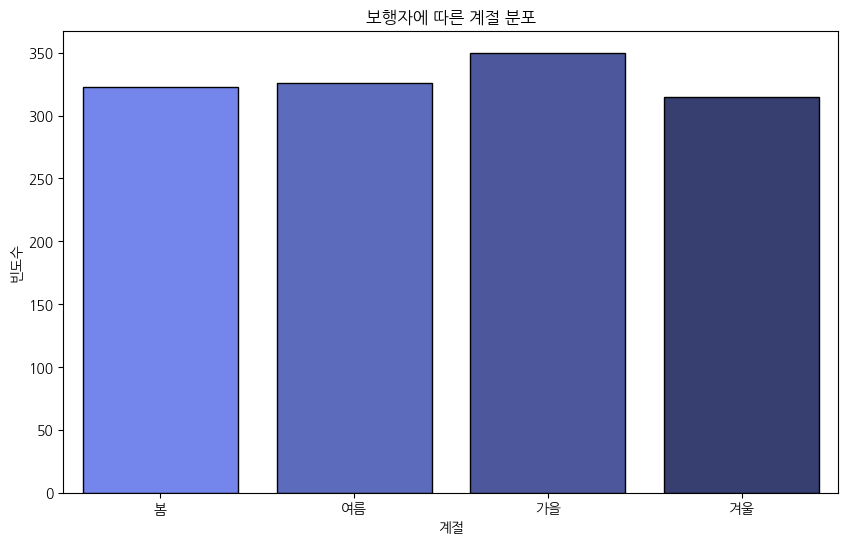

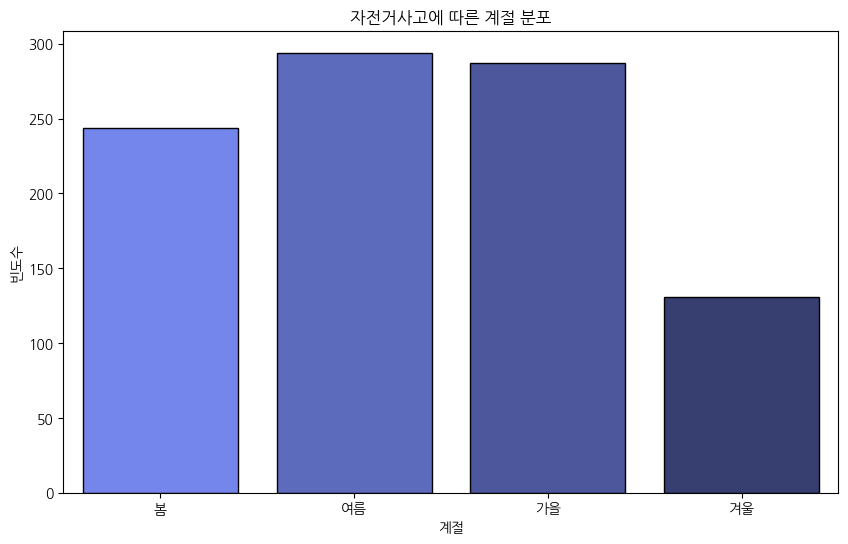

In [52]:
# 각 사고유형별로 bar plot 그리기
for accident_type in unique_accident_types:
    plt.figure(figsize=(10, 6))
    subset = df[df['교통사고명'] == accident_type]
    season_count = subset['계절구분명'].value_counts().reindex(season_order).reset_index()
    season_count.columns = ['계절구분명', 'count']
    
    ax = sns.barplot(x='계절구분명', y='count', data=season_count, palette =['#6078FF','#4D60CC','#3F4FA8','#2D3878'])
    
    # 각 막대의 테두리 선 굵기 설정
    for patch in ax.patches:
        patch.set_edgecolor('black')  # 테두리 색상 설정
        patch.set_linewidth(1)  # 테두리 굵기 설정
    
    plt.title(f'{accident_type}에 따른 계절 분포')
    plt.xlabel('계절')
    plt.ylabel('빈도수')
    plt.show()

시간

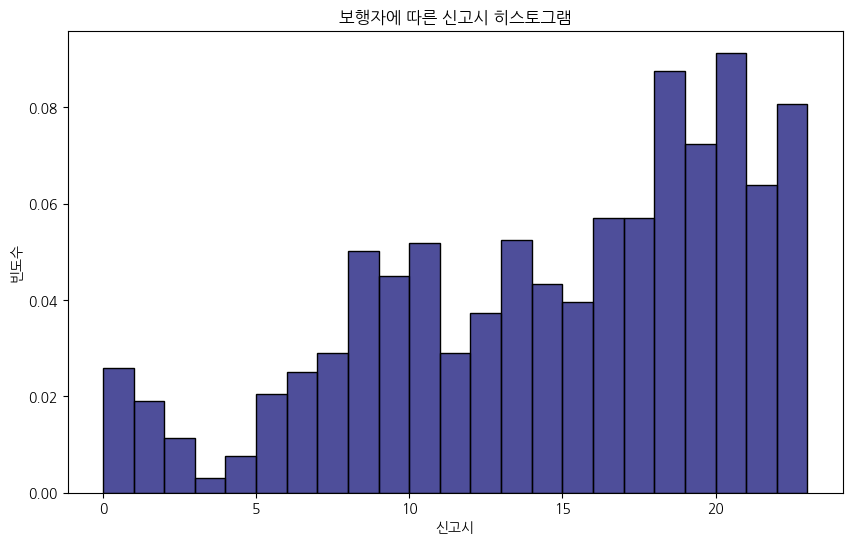

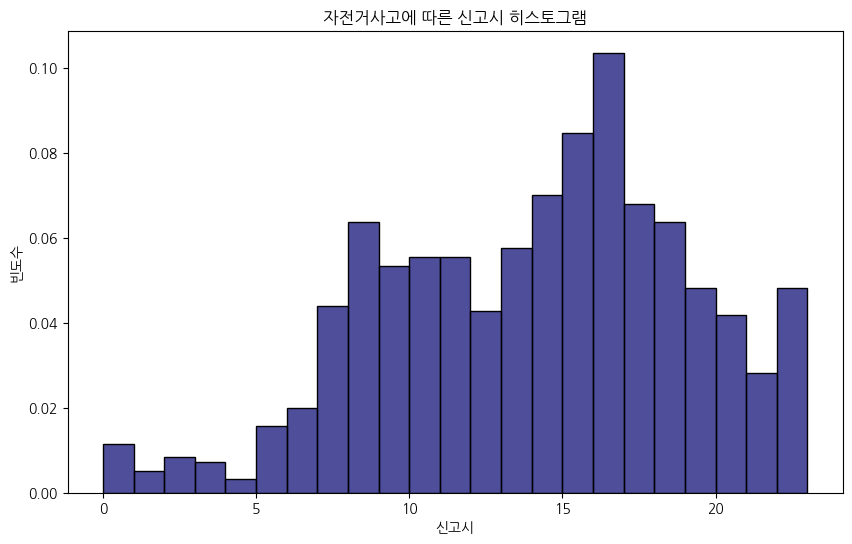

In [62]:
unique_accident_types = df['교통사고명'].unique()

# 각 사고유형별로 히스토그램 그리기
for accident_type in unique_accident_types:
    plt.figure(figsize=(10, 6))
    subset = df[df['교통사고명'] == accident_type]
    sns.histplot(data=subset, x='신고시', binwidth=1, color='#121278', linewidth=1, stat='density')
    plt.title(f'{accident_type}에 따른 신고시 히스토그램')
    plt.xlabel('신고시')
    plt.ylabel('빈도수')
    plt.show()

In [53]:
season_order = ['월요일', '화요일', '수요일', '목요일','금요일','토요일','일요일']
df['요일'] = pd.Categorical(df['요일'], categories=season_order, ordered=True)

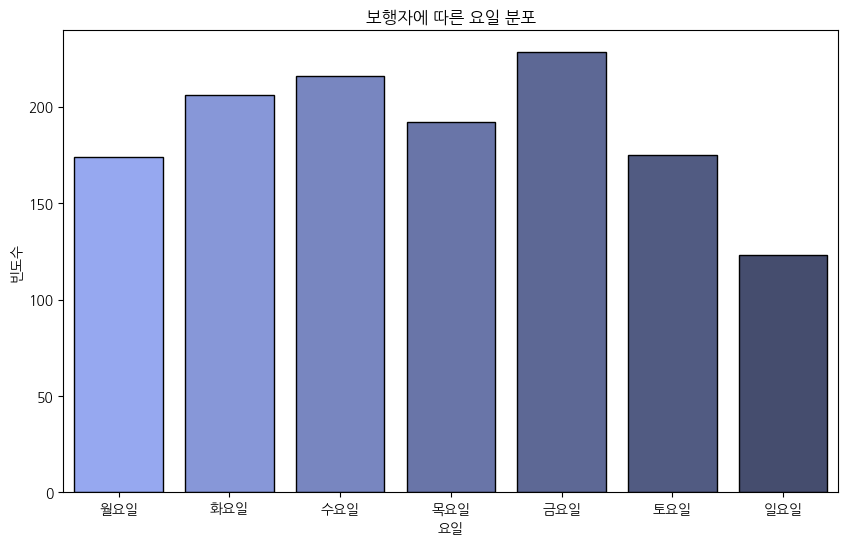

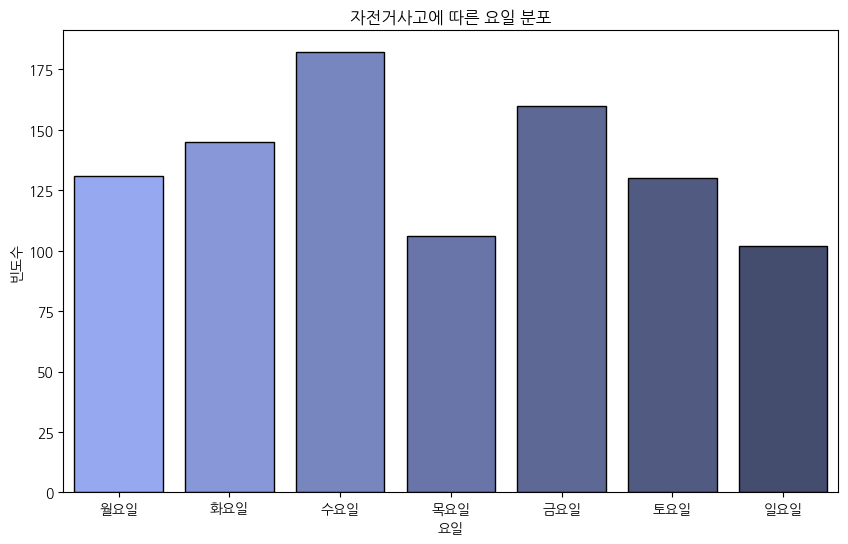

In [54]:
# 각 사고유형별로 bar plot 그리기
for accident_type in unique_accident_types:
    plt.figure(figsize=(10, 6))
    subset = df[df['교통사고명'] == accident_type]
    season_count = subset['요일'].value_counts().reindex(season_order).reset_index()
    season_count.columns = ['요일', 'count']
    
    ax = sns.barplot(x='요일', y='count', data=season_count, palette =['#879FFF','#798FE6','#6C7FCC','#5E6FB3','#54629E','#49568A','#3E4975'])
    
    # 각 막대의 테두리 선 굵기 설정
    for patch in ax.patches:
        patch.set_edgecolor('black')  # 테두리 색상 설정
        patch.set_linewidth(1)  # 테두리 굵기 설정
    
    plt.title(f'{accident_type}에 따른 요일 분포')
    plt.xlabel('요일')
    plt.ylabel('빈도수')
    plt.show()